In [54]:
import pandas as pd
import numpy as np

import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [55]:
# obtained by tesseract lib

data = pd.read_csv('final_data.csv')
data = pd.DataFrame(data["Text"])

In [56]:
data.shape

(4516, 1)

In [57]:
data.head()

,Text
0,"9 THE AIML StORE1234 SOMEWHERE RD iPOWAY, CALI..."
1,2 i LEGALSAFE SHOP mas = WITHAndDIRECT few > G...
2,10 COMPANY NAME Salary slip for January 2015...
3,2 NAGASWARAHhuie © PublishingSURAT KETERANGAN...
4,5 =GND002365:!


In [58]:
data.tail()

,Text
4511,"10 ‘Abc LimitedIndore 52010, hy Padesh, NOU,s..."
4512,"7 Residence: 423 North 2nd Streetity, State, a..."
4513,1 Page 10f5. 03/02/2022bc 1090001004290 as)An...
4514,8 (GENERAL DURABLE POWER OF ATTORNEY‘THE POWER...
4515,11 TFC5905 TANG/FONG CORPORATION05 Federal Sta...


In [59]:
data.isnull().sum()

Text    0
dtype: int64

In [60]:
def get_label(text):
    k=''
    for i in text:
        if i==' ':
            if len(k)>2:
                return 8
            return int(k)
        k+=i

In [61]:
data['label'] = data['Text'].apply(lambda x: get_label(x))
data["Text"] = data['Text'].str[1:]

In [62]:
data.head()

,Text,label
0,"THE AIML StORE1234 SOMEWHERE RD iPOWAY, CALIF...",9
1,i LEGALSAFE SHOP mas = WITHAndDIRECT few > Go...,2
2,0 COMPANY NAME Salary slip for January 2015 ...,10
3,NAGASWARAHhuie © PublishingSURAT KETERANGAN ...,2
4,=GND002365:!,5


In [63]:
#data.to_csv(r'D:\coding\doc2\doc_classification\xyz.csv', index = False, header=True)

<AxesSubplot:>

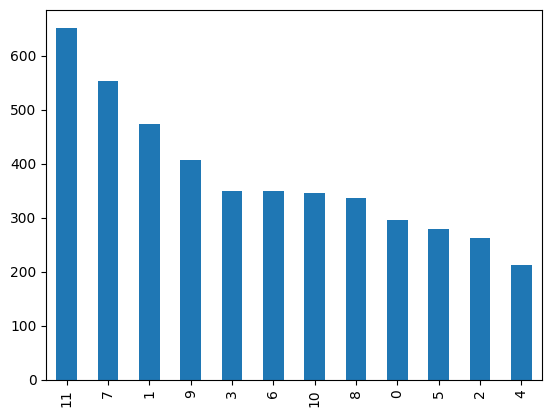

In [64]:
data.label.value_counts().plot(kind='bar')

In [65]:
data.head()

,Text,label
0,"THE AIML StORE1234 SOMEWHERE RD iPOWAY, CALIF...",9
1,i LEGALSAFE SHOP mas = WITHAndDIRECT few > Go...,2
2,0 COMPANY NAME Salary slip for January 2015 ...,10
3,NAGASWARAHhuie © PublishingSURAT KETERANGAN ...,2
4,=GND002365:!,5


In [66]:
mapping = {0:'address_proof', 1:"bank_statements",2:"business_proof",3:"employment_proof",4:'fund_raising',5:'identity_proof',6:'invoices',7:'personal_finance_statement',8:'power_of_attorney',9:'receipts',10:'salary_slip',11:'tax_return'}
data['label'].replace(mapping,inplace = True)


data.shape

(4516, 2)

In [67]:
data.head()

,Text,label
0,"THE AIML StORE1234 SOMEWHERE RD iPOWAY, CALIF...",receipts
1,i LEGALSAFE SHOP mas = WITHAndDIRECT few > Go...,business_proof
2,0 COMPANY NAME Salary slip for January 2015 ...,salary_slip
3,NAGASWARAHhuie © PublishingSURAT KETERANGAN ...,business_proof
4,=GND002365:!,identity_proof


In [68]:
data.tail()

,Text,label
4511,"0 ‘Abc LimitedIndore 52010, hy Padesh, NOU,se...",salary_slip
4512,"Residence: 423 North 2nd Streetity, State, an...",personal_finance_statement
4513,Page 10f5. 03/02/2022bc 1090001004290 as)Any...,bank_statements
4514,(GENERAL DURABLE POWER OF ATTORNEY‘THE POWERS...,power_of_attorney
4515,1 TFC5905 TANG/FONG CORPORATION05 Federal Stat...,tax_return


In [69]:
mapping = {0:'address_proof', 1:"bank_statements",2:"business_proof",3:"employment_proof",4:'fund_raising',5:'identity_proof',6:'invoices',7:'personal_finance_statement',8:'power_of_attorney',9:'receipts',10:'salary_slip',11:'tax_return'}
data['label'].replace(mapping,inplace = True)

<AxesSubplot:>

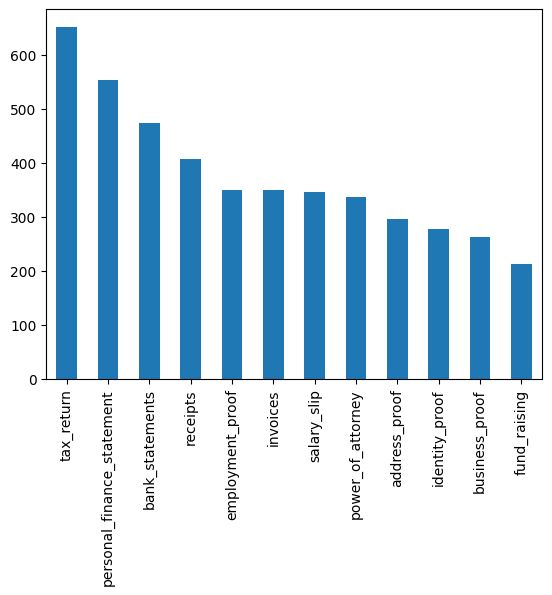

In [70]:
data.label.value_counts().plot(kind='bar')

In [71]:
data.label.value_counts()

tax_return                    652
personal_finance_statement    553
bank_statements               474
receipts                      406
employment_proof              350
invoices                      350
salary_slip                   346
power_of_attorney             337
address_proof                 295
identity_proof                278
business_proof                262
fund_raising                  213
Name: label, dtype: int64

In [72]:
data['Text'] = data['Text'].replace(r'[^A-Za-z0-9 ]+', '')
data['Text'] = data['Text'].apply (lambda x: re.sub(r"((?<=^)|(?<= )).((?=$)|(?= ))", '', x).strip())

# replacing the punctuations and the other sindle lettered words
# 

In [73]:
vectorizer = CountVectorizer(stop_words='english') 

# for counting the frequencies of words

In [74]:
x = data['Text']
y = data['label']

In [75]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 88)


#

In [76]:
x_vec = vectorizer.fit_transform(x_train)
x_vec

<3612x12164 sparse matrix of type '<class 'numpy.int64'>'
	with 316012 stored elements in Compressed Sparse Row format>

In [77]:
model = MultinomialNB()

In [78]:
model.fit(x_vec,y_train)

MultinomialNB()

In [79]:
y_pred = model.predict(vectorizer.transform(x_test))
y_pred

array(['tax_return', 'invoices', 'address_proof', 'employment_proof',
       'identity_proof', 'tax_return', 'tax_return', 'receipts',
       'tax_return', 'employment_proof', 'identity_proof',
       'power_of_attorney', 'identity_proof', 'employment_proof',
       'receipts', 'tax_return', 'business_proof',
       'personal_finance_statement', 'salary_slip', 'tax_return',
       'invoices', 'salary_slip', 'tax_return', 'bank_statements',
       'tax_return', 'receipts', 'address_proof', 'bank_statements',
       'bank_statements', 'personal_finance_statement', 'tax_return',
       'tax_return', 'tax_return', 'invoices', 'salary_slip',
       'tax_return', 'invoices', 'employment_proof', 'fund_raising',
       'bank_statements', 'invoices', 'power_of_attorney', 'fund_raising',
       'tax_return', 'tax_return', 'power_of_attorney', 'salary_slip',
       'address_proof', 'fund_raising', 'business_proof',
       'personal_finance_statement', 'address_proof', 'business_proof',
       'pe

In [80]:
print(accuracy_score(y_test,y_pred))

0.9712389380530974


In [92]:
te = pd.read_csv('test.csv')
te

,Text
0,STATE OF SOUTH CAROLINA _ ) AFFIDAVIT OF RESI...


In [93]:
te.isnull().sum()

Text    0
dtype: int64

In [94]:
test = te['Text']
test

0    STATE OF SOUTH CAROLINA _ ) AFFIDAVIT OF  RESI...
Name: Text, dtype: object

In [95]:
test_vec = vectorizer.transform(test)
test_vec

<1x12164 sparse matrix of type '<class 'numpy.int64'>'
	with 61 stored elements in Compressed Sparse Row format>

In [86]:
model.predict(vectorizer.transform(test))

array(['address_proof'], dtype='<U26')

In [87]:
# exporting the model

In [88]:
import pickle

In [89]:
pickle.dump(model,open('naive_model.pkl','wb'))